### 1. Import and warehouse data

In [1]:
# Import All required Libraries for the Data processing and Modeling.

# for Data warehouse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('darkgrid')

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# for statistical analysis
from scipy.stats import ttest_ind,f_oneway,chi2_contingency 

# pre-processing method
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import roc_curve,auc,classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold as SKF
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import time

# for target balancing
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

# the Classification models 
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
# Read Datasets

data1 = pd.read_csv('TelcomCustomer-Churn_1.csv')

data2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [3]:
# display first 5 rows in dataset1
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [4]:
# chesk for size and shape of dataset1

data1.shape

# Observation : In dataset1 there are 10 columns and 7043 rows.

(7043, 10)

In [5]:
# display first 5 rows in dataset2

data2.head()

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# display size and shape of Dataset2

data2.shape

# Observation : In dataset2 there are 11 columns and 7043 rows
# We can see that both datasets have equal no of columns.So, we can easily combine 2 datasets.

(7043, 11)

In [7]:
# combine 2 datasets.

data = pd.concat([data1,data2],axis=1)

In [8]:
# display top rows of combined dataset (data)

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# check for the shape of the data

data.shape

(7043, 21)

In [10]:
# check for the Columns in the data.

data.columns

# Observation : we can drop two columns (key_0,customer_Id) from our data beacuse those are not useful for Analysis.

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

###  2. Data cleansing

In [11]:
# Drop Key_0,Customer ID Columns.

data.drop(columns = ['customerID'],axis=1,inplace = True)

In [12]:
# check for datatypes and Null counts in the data.

data.info()

# Observation : We can see Total Charges Column is of object type.So, check the values in the column.
# Convert object type columns to categorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
# convert Totalcharges column to Numeric

data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [14]:
# check for null values in the data

data.isna().sum()

# Observation : we can see there are no null values in the Data.

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
# drop the null values

data.dropna(inplace=True)

In [16]:
# check for shape of the data after drop th null values

data.shape

# observation : 11 rows has been dropped

(7032, 20)

In [17]:
# count the values of Object type Columns 

for col in data.columns: # Loop through all columns in the dataframe
    if data[col].dtype == 'object': # Only apply for columns object type
        print(data[col].value_counts(),'\n')
        
# observation : all object type columns contains the Categorical values.

Male      3549
Female    3483
Name: gender, dtype: int64 

No     3639
Yes    3393
Name: Partner, dtype: int64 

No     4933
Yes    2099
Name: Dependents, dtype: int64 

Yes    6352
No      680
Name: PhoneService, dtype: int64 

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64 

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64 

No                     2809
Yes                    2703
No internet service    15

In [18]:
# convert all categorical values to Continuous using label Encoder

# build labelencoder
le = preprocessing.LabelEncoder()

# create duplicate dataframe
encoded_data = data

# store all columns is of object type
object_col = encoded_data.select_dtypes(include=['object']).columns

for i in object_col:
    encoded_data[i] = le.fit_transform(data[i]) # call encoder for object columns

In [19]:
# display top rows from Encoded_data

encoded_data.head()
# Observation : we can see all categorical values converted to continuous.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [20]:
# check for datatypes

encoded_data.dtypes

# Observation : all object type columns is of int32. So, convert them into categorical.

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [21]:
# convert data type of categorical columns as "category" type

for i in data.columns:
    if data[i].dtype == 'int32':
        encoded_data[i] = encoded_data[i].astype('category')

In [22]:
# We can see that SeniorCitizen column is continuous Values
# convert to Categorical Column

encoded_data['SeniorCitizen'] = encoded_data['SeniorCitizen'].astype('category')

In [23]:
# check for Data types and null values

encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

In [24]:
# check for Statistical values of numerical columns

encoded_data.describe()

# observation : we can see that mean values are different.

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### 3. Data analysis & visualisation

#### Univariate Avalysis

For Numerical Variables

In [25]:
# create Funtion for uni-vatiate-Analysis for Numerical Varibales
# function have the parameters column name and Color.

def uni_num_plot(col,color):
    fig, ax = plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(15)

    sns.histplot(data[col],ax=ax[0],color=color) # plotting histplot
    sns.boxplot(data[col],ax=ax[1],color=color) # plotting boxplot
    
    ax[0].set_title(str(col)+' Varibale Hist plot')
    ax[1].set_title(str(col)+' Variable Boxplot')

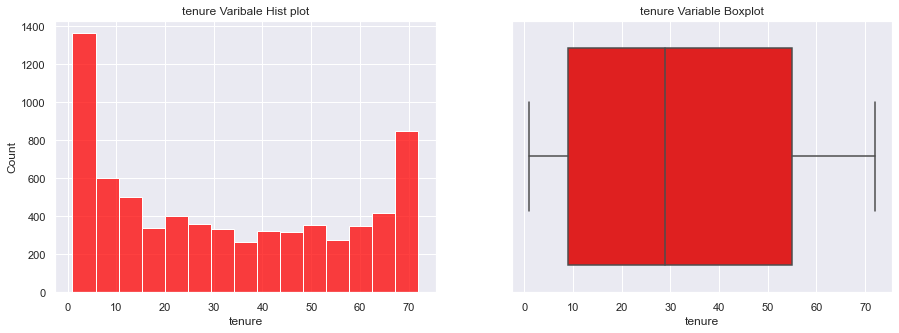

In [26]:
# plotting Hist and box plot for tenure column

uni_num_plot('tenure','red')

from  Above plots we can see, from hist plot Maximum no of customers contains the tenure 0-10 and from box plot We can see there are no outliers in the column, most of the customers have the tenure in between 10-55.

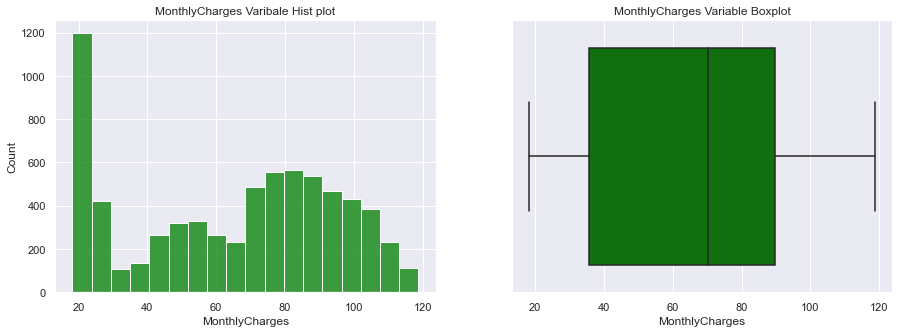

In [27]:
# plotting hist and box plot for Monthlycharges of the customers.

uni_num_plot('MonthlyCharges','green')

from  Above plots we can see, from hist plot Maximum no of customers MontlyCharges is 20 and from box plot We can see there are no outliers in the column, most of the customers have the montlycarges in between 40-90.

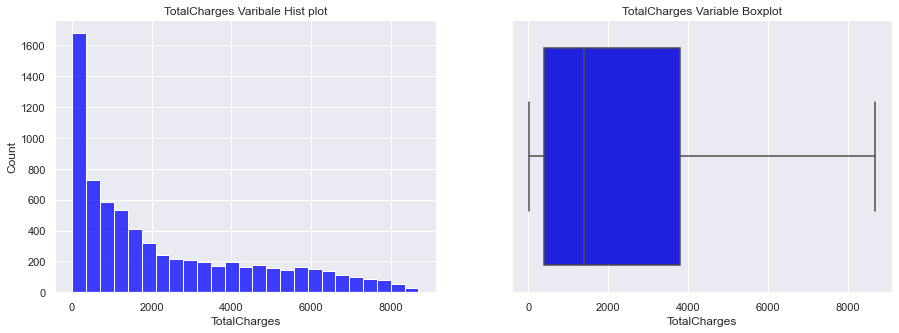

In [28]:
# pllotting hist and box plot for Total charges of the customers

uni_num_plot('TotalCharges','blue')

from  Above plots we can see, from count plot Maximum no of customers Total charges is approximately 500 and from box plot We can see there are no outliers in the column, most of the customers have the Totalcharges in between 0-4000.

 For Categorical variables

In [29]:
# create Funtion for uni-vatiate-Analysis for categorical Varibales
# function have the parameter column name.

def uni_category_plot(col):
    if encoded_data[col].dtype == 'category':
        fig, ax = plt.subplots(1,2)
        fig.set_figheight(4)
        fig.set_figwidth(12)

        color=sns.color_palette('bright')
        sns.countplot(encoded_data[col],ax=ax[0],palette='bright')
        encoded_data[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True,colors=color)
        ax[0].set_title(str(col)+' Variable Count plot')
        ax[1].set_title(str(col)+' Variable Piechart')

In [30]:
# lets us know the columns of type category in data

encoded_data.select_dtypes(include=['category']).columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

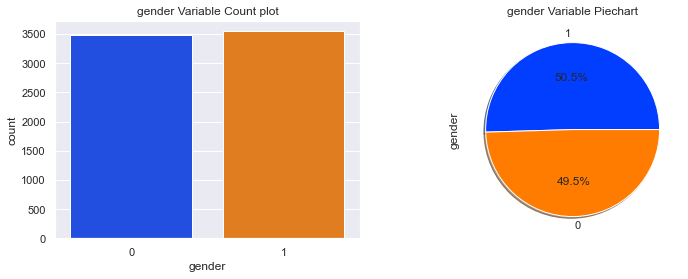

In [31]:
# plot count plot and piechart for Gender variable

uni_category_plot('gender')

From above Plots we can See that there are Equal no of male and female customers in out data.Male Customers are 1% more than Female customers.

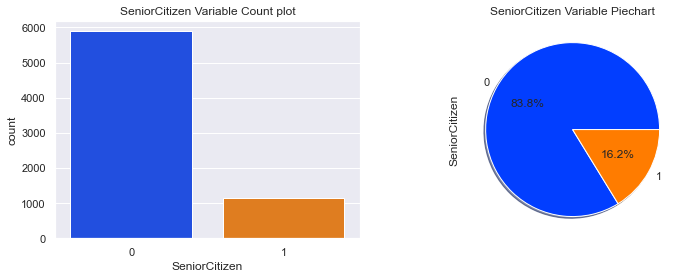

In [32]:
# plot count plot and piechart for Senior Citizen variable
uni_category_plot('SeniorCitizen')

From above Plots We can see There are 16% customers are Seninor Citizens and 84% customers are Adults. so in our data there are more Adults.

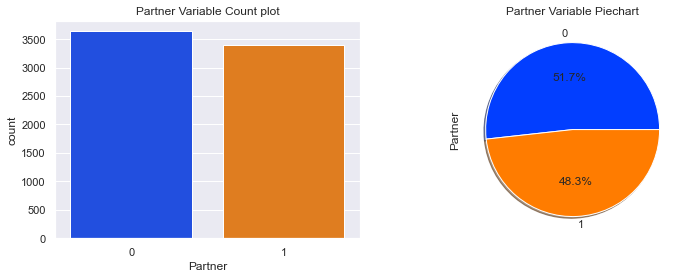

In [33]:
# plot count plot and piechart for Partner variables variable
uni_category_plot('Partner')

From above Plots we can See that there are 52% of Customers are not have partners and 48% of the Customers are have Partners. 

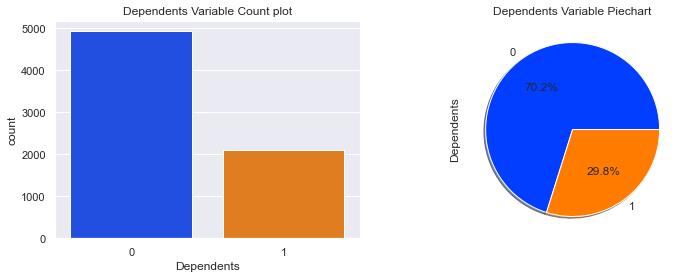

In [34]:
# plot count plot and piechart for Dependets variable
uni_category_plot('Dependents')

From above Plots we can See that 70% customers are Dependents and 30% customers are not Dependent.

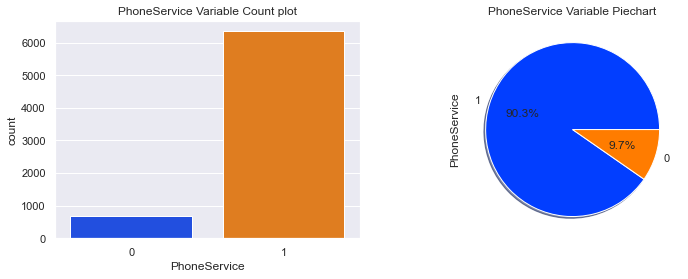

In [35]:
# plot count plot and piechart for Phoneservice variable
uni_category_plot('PhoneService')

From above Plots we can See that 90% customers are using PhoneServices and 10% customers are not Using Phone services.

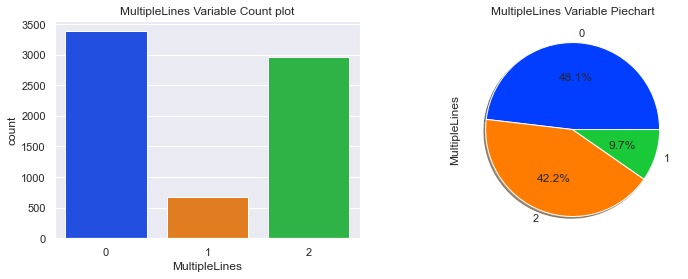

In [36]:
# plot count plot and piechart for Multiplelines variable
uni_category_plot('MultipleLines')

From above Plots we can See that In 90% customers Who are using Phones services in that there are 48% customers are using Multiple Lines and 42% customers are not using Multiple lines.

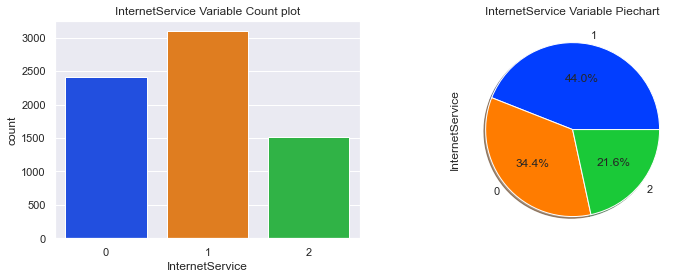

In [37]:
# plot count plot and piechart for InternetService variable
uni_category_plot('InternetService')

From above Plots we can See that 78% customers are using Internet Services in that 44% customers are using FiberOptic type Internet Service and 34% customers are using DSL type Internet Servicing.22% customers are not using Internet Services.

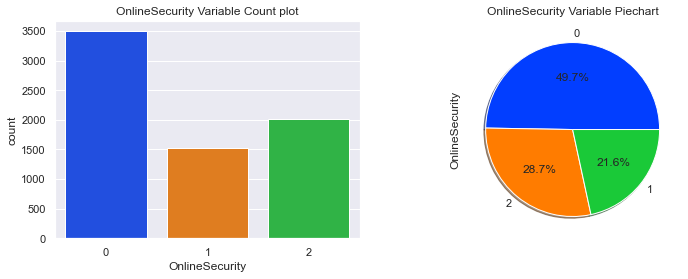

In [38]:
# plot count plot and piechart for OnlineSecurity variable
uni_category_plot('OnlineSecurity')

From above Plots we can See that there are 50% customers have the Online Security and 29% customers are not have the Onlinesecurity and 21% customers are not using Internet Services.

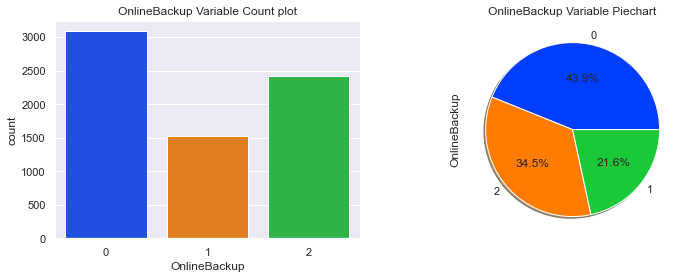

In [39]:
# plot count plot and piechart for Online backup variable
uni_category_plot('OnlineBackup')

From above Plots we can See that there are 44% customers have the Online backup and 34% customers are not have the Online backup and 22% customers are not using Internet Services.

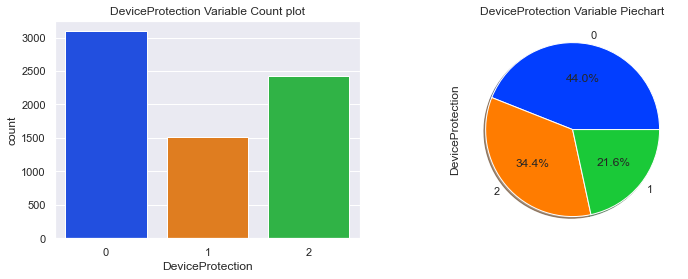

In [40]:
# plot count plot and piechart for DeviceProtection variable
uni_category_plot('DeviceProtection')

From above Plots we can See that there are 44% customers does not have the Device protection and 34% customers are have the Device Protection and 22% customers are not using Internet Services.

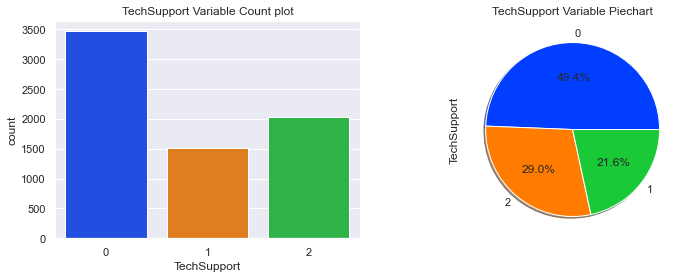

In [41]:
# plot count plot and piechart for TechSupport variable
uni_category_plot('TechSupport')

From above Plots we can See that there are 49% customers have the techSupport and 29% customers are not have the Techsupport and 22% customers are not using Internet Services.

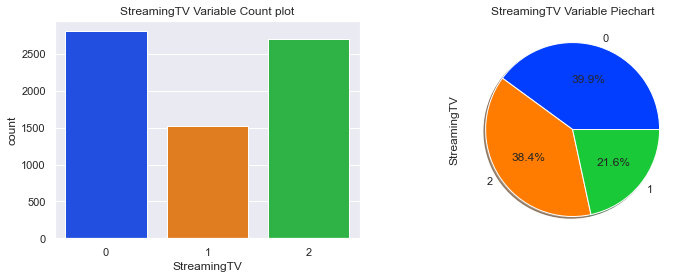

In [42]:
# plot count plot and piechart for StreamingTV variable
uni_category_plot('StreamingTV')

From above Plots we can See that there are 40% customers are Streaming TV and 38% customers are not Streaming TV  and 22% customers are not using Internet Services.

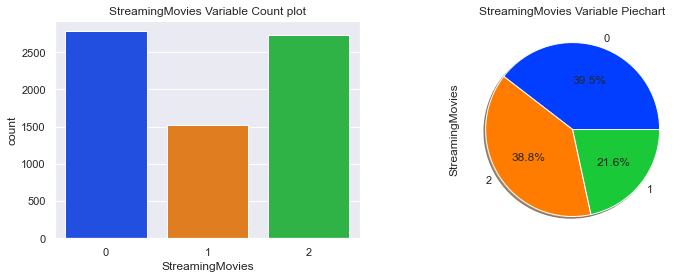

In [43]:
# plot count plot and piechart for StreamingMovies variable
uni_category_plot('StreamingMovies')

From above Plots we can See that there are 39% customers are Streamin Movies and 39% customers are not streaming Movies and 22% customers are not using Internet Services.

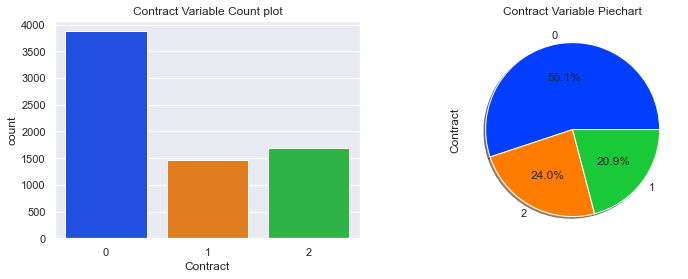

In [44]:
# plot count plot and piechart for Contract variable
uni_category_plot('Contract')

From above Plots we can See that there are 55% customers have the Month-to-month Contract and 24% customers have the Two year contract and 21% customers have the one year Contract.

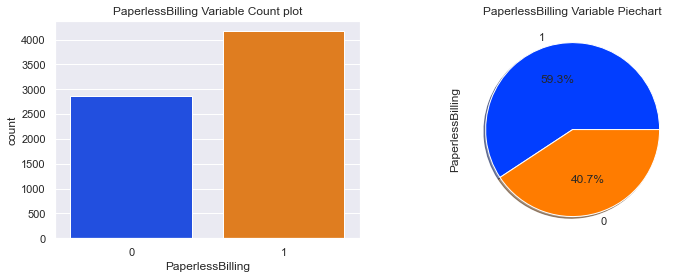

In [45]:
# plot count plot and piechart for PaperlessBilling variable
uni_category_plot('PaperlessBilling')

From above Plots we can See that there are 59% customers are using Paperless billing and 41% customers are using paper billings.

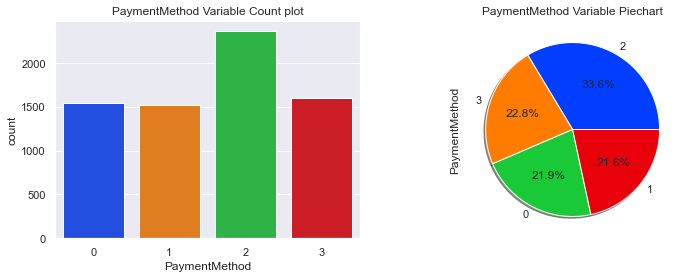

In [46]:
# plot count plot and piechart for OnlineSecurity variable
uni_category_plot('PaymentMethod')

From above Plots we can See that there are 33% customers are using Electronic mail as Payment Method,23% customers are using Mailed check as Payment method,22% customers are using Bank transfer as Payment Method and 22% customers are using Credit card as Payment method.

#### Bivariate Avalysis

### Numerical vs Numerical

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

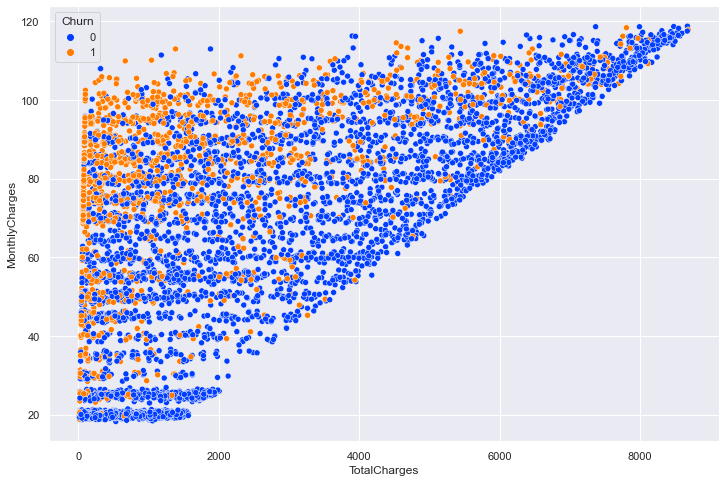

In [47]:
plt.figure(figsize = (12,8))
sns.scatterplot(x=encoded_data['TotalCharges'],y=encoded_data['MonthlyCharges'],hue=encoded_data['Churn'],palette='bright')

 From Above plot We can see, there is some relation between variables.most of the Churn Customers are with low TotalCharges and High monthly Charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

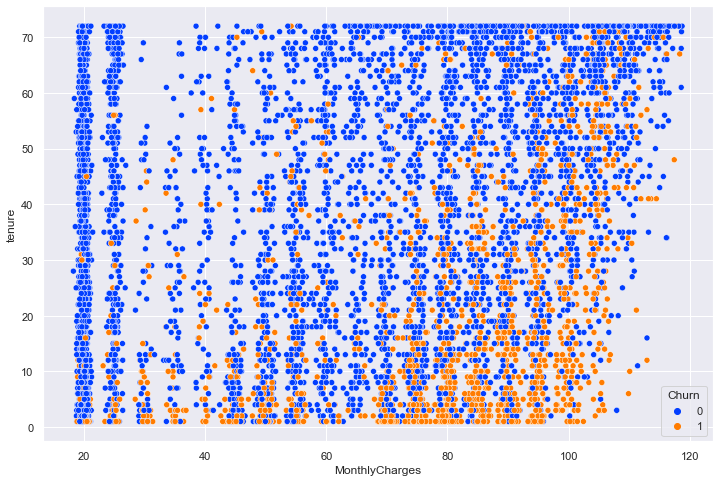

In [48]:
plt.figure(figsize = (12,8))
sns.scatterplot(x=encoded_data['MonthlyCharges'],y=encoded_data['tenure'],hue=encoded_data['Churn'],palette='bright')

From Above Plot We Can see, that the two are varibales have no correlation and Most of the churn customers having the values of tenure low when montly charges is high.

<AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>

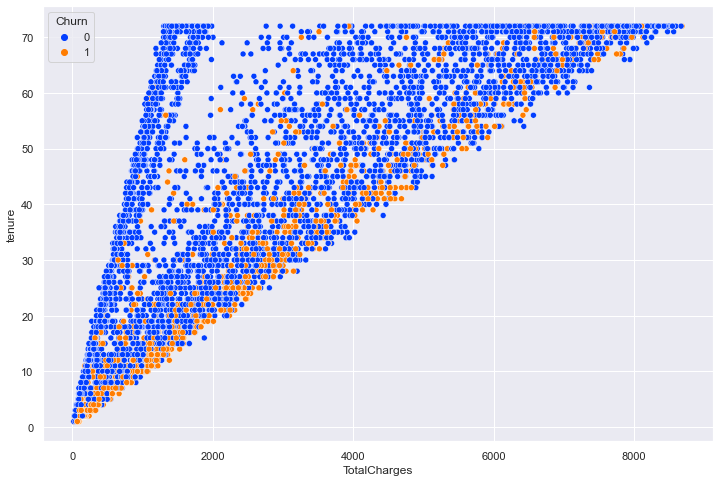

In [49]:
plt.figure(figsize = (12,8))
sns.scatterplot(x=encoded_data['TotalCharges'],y=encoded_data['tenure'],hue=encoded_data['Churn'],palette='bright')

From Above plot we can see some positive correlation among the variables and most of the churn customers values are directly proportional to the varibales.

### Categorical vs Categorical

In [50]:
# Store the category columns 

category_columns = encoded_data.select_dtypes(include=['category']).columns

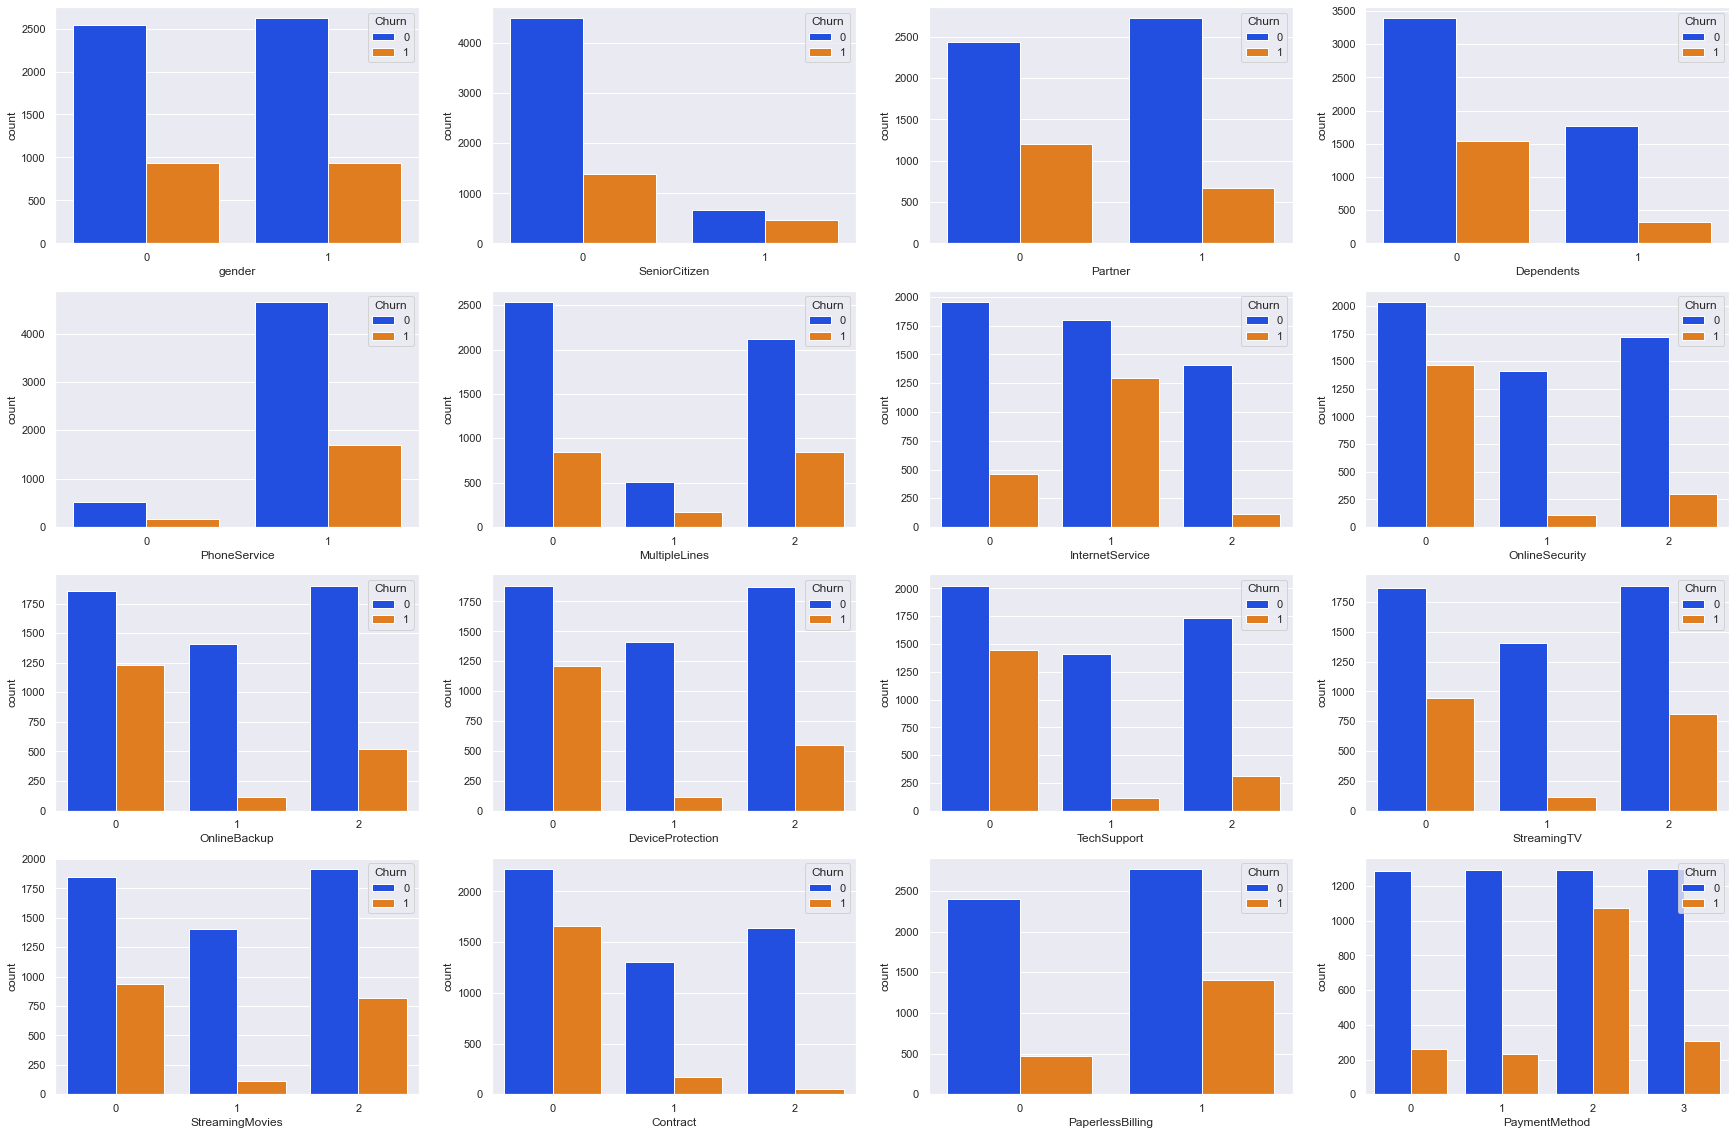

In [51]:
# setting the figure size
fig,ax = plt.subplots(4,4,figsize=(30,20))### Categorical vs Categorical
k=0
for i in range(4):
    for j in range(4):
        sns.countplot(x=encoded_data[category_columns[k]], hue=encoded_data['Churn'], ax=ax[i][j],palette='bright')
        k = k+1

 From above plots We can see, Churn customers are less than the not churn Customers.Most of the churn customers having the following values that internet service is of type-1,Onlinesecurity is of type-0,Onlinebackup is of type-0,techsupport is of type-0,payment method is of type-2.So, if we focus on those values then the churn customers will be decreased.

### Categorical vs Numerical

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

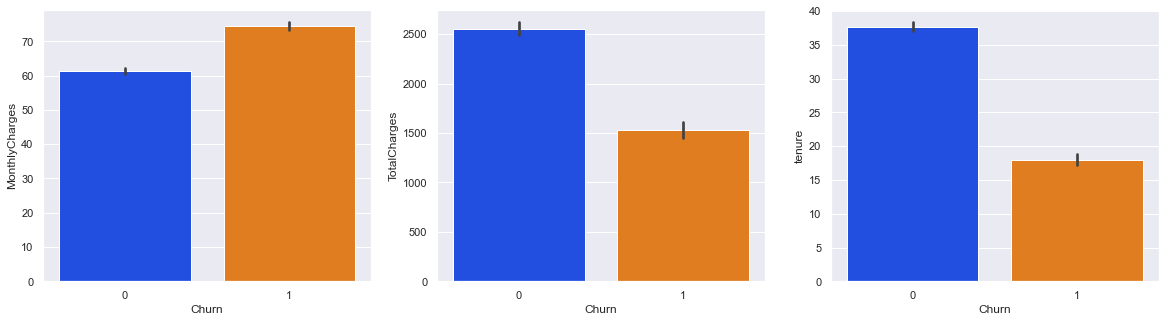

In [52]:
# plotting Bar plots for Numerical variabels Classified by churn
fig,ax = plt.subplots(1,3,figsize=(20,5))
sns.barplot(x=encoded_data['Churn'],y=encoded_data['MonthlyCharges'], ax=ax[0],palette='bright')
sns.barplot(x=encoded_data['Churn'],y=encoded_data['TotalCharges'],  ax=ax[1],palette='bright')
sns.barplot(x=encoded_data['Churn'],y=encoded_data['tenure'], ax=ax[2],palette='bright')

From above plot We can see in monthly charges column Churn customers are greater than the non churn customers and in remaining two Columns churn customers are less than the non churn customers.

#### Multivariate Anlysis

<AxesSubplot:>

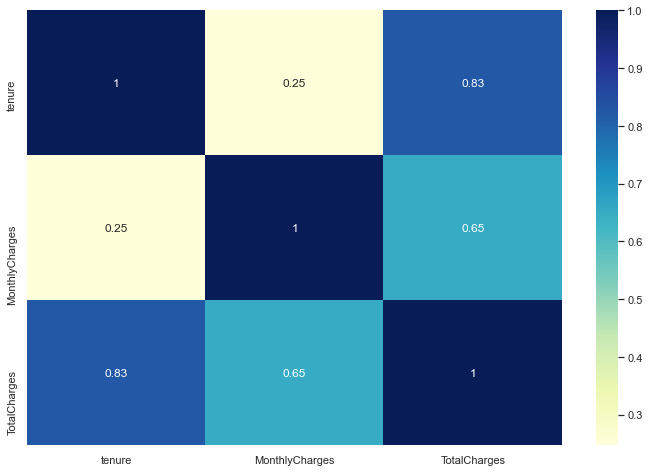

In [53]:
# plotting heatmap for Correaltion of the data

plt.figure(figsize=(12,8))
sns.heatmap(encoded_data.corr(),annot=True,cmap='YlGnBu')

 From above heat map we can see that total_charges and tenure having the high positive correlation and remaining varibales are less positive correlation.

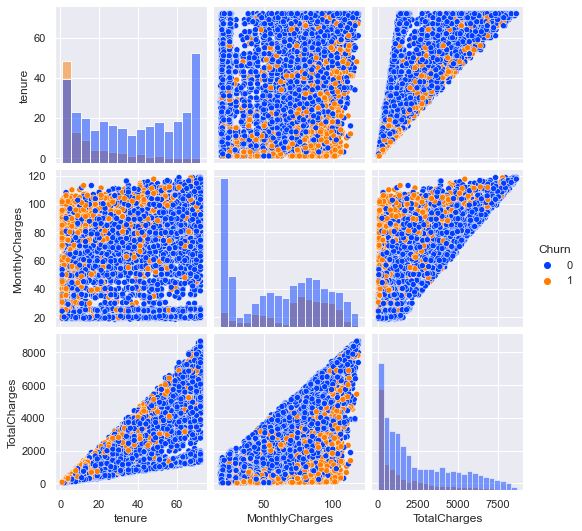

In [54]:
# plotting Numerical pairplot

num_data = encoded_data.select_dtypes(include=['int64','float64'])
num_data['Churn'] = encoded_data['Churn']
sns.pairplot(data=num_data,hue='Churn',palette='bright',diag_kind='hist')

pairplot shows the correlation visually.From above plot, total Charges column has positive correlation with other two columns.

#### Statistical Anlysis

In [55]:
# mean of Attributes for Target Column

encoded_data.groupby(['Churn']).mean()

,tenure,MonthlyCharges,TotalCharges
Churn,,,
0,37.650010,61.307408,2555.344141
1,17.979133,74.441332,1531.796094


In [56]:
# count of the Attributes for Target column

encoded_data.groupby(['Churn']).count()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,
0,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163
1,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


### Statistical Testing
#### Two-sample unpaired t-test

Statistical Testing for continuous features with target variable.
Here we use two-sample unpaired t-test
* $H_0$: There is no significant difference for Numerical varibales with target varibale
* $H_A$: There is a significance difference for Numerical varibales with target varibale

In [57]:
# continuous variables list
num_col=list(encoded_data.select_dtypes(include=['int64','float64']).columns)

for i in num_col:
    group1 = np.array(encoded_data.dropna()[encoded_data.Churn == 0][i]) 
    group2 = np.array(encoded_data.dropna()[encoded_data.Churn == 1][i])
    t, p_value  = ttest_ind(group1,group2, axis = 0,equal_var=False)
    print('P_Value:',p_value)
    if p_value < 0.05:  # Setting our significance level at 5%
        print('Rejecting Null Hypothesis,',i,'of customers left the company and not left the company are not same.')
    else:
        print('Fail to Reject Null Hypothesis,',i,'of customers left the company and not left the company are same.')
    print('\n')

P_Value: 2.347074718895754e-234
Rejecting Null Hypothesis, tenure of customers left the company and not left the company are not same.


P_Value: 2.657357144516026e-72
Rejecting Null Hypothesis, MonthlyCharges of customers left the company and not left the company are not same.


P_Value: 1.1524944112838114e-75
Rejecting Null Hypothesis, TotalCharges of customers left the company and not left the company are not same.




#### Chi-square test

Statistical Analysis For categorical variables with target variable.Here we use Chi-square tests of independence.
* $H_0$: There is no significant difference for categorical variables with target varibales
* $H_A$: There is a significance difference for categorical variables with target varibales

In [58]:
for i in category_columns:
    crosstab=pd.crosstab(encoded_data['Churn'],encoded_data[i])
    chi,p_value,dof,expected=chi2_contingency(crosstab)
     
    print('P_Value:',p_value)
    if p_value < 0.05:  # Setting our significance level at 5%
        print('Rejecting Null Hypothesis. There is significant difference in',i,'with Churn')
    else:
        print('Fail to Reject Null Hypothesis. There is no significant difference in',i,'with Churn')
    print('\n')

P_Value: 0.4904884707065509
Fail to Reject Null Hypothesis. There is no significant difference in gender with Churn


P_Value: 2.4792557203954705e-36
Rejecting Null Hypothesis. There is significant difference in SeniorCitizen with Churn


P_Value: 3.97379757451591e-36
Rejecting Null Hypothesis. There is significant difference in Partner with Churn


P_Value: 2.0196592017051303e-42
Rejecting Null Hypothesis. There is significant difference in Dependents with Churn


P_Value: 0.34992398942431924
Fail to Reject Null Hypothesis. There is no significant difference in PhoneService with Churn


P_Value: 0.0035679273999811405
Rejecting Null Hypothesis. There is significant difference in MultipleLines with Churn


P_Value: 5.831198962236941e-159
Rejecting Null Hypothesis. There is significant difference in InternetService with Churn


P_Value: 1.4006867477839222e-184
Rejecting Null Hypothesis. There is significant difference in OnlineSecurity with Churn


P_Value: 7.776099238804965e-131
Rejecti

In [59]:
# from above Statistical analysis gender and phoneservices have the no difference with target variable.
# drop the gender and phoneservice columns

encoded_data.drop(columns=['gender','PhoneService'],axis=1,inplace=True)

### 4. Data pre-processing

In [60]:
# Arrange data into independent variables and dependent variables

X=encoded_data.drop(columns='Churn')
y=encoded_data['Churn'] #target

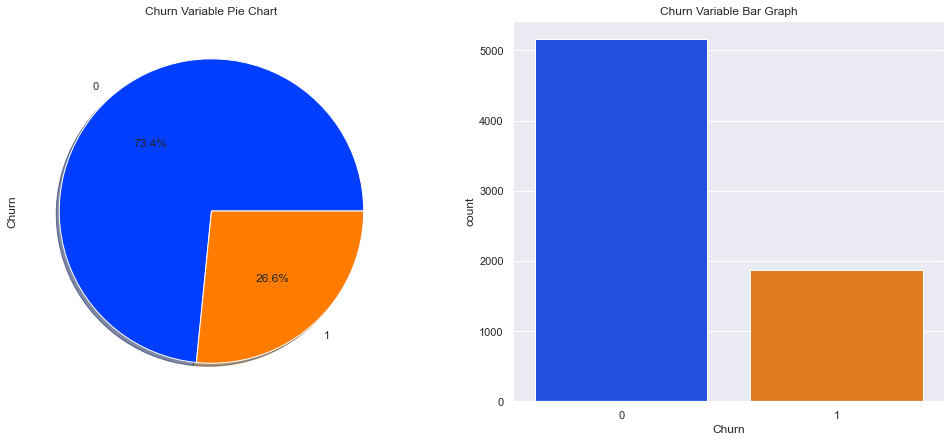

In [61]:
# Checking for target Balancing

color=sns.color_palette('bright')
f,axes=plt.subplots(1,2,figsize=(17,7))
encoded_data['Churn'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True,colors=color)
sns.countplot(encoded_data['Churn'],ax=axes[1],palette='bright')
axes[0].set_title('Churn Variable Pie Chart')
axes[1].set_title('Churn Variable Bar Graph')
plt.show()

###### There is a Huge Imbalance in the target variable. So we need balance the target Variable. Because Imbalance of target Variable will lead to misclassification of the target values. To Balance the target Varibale we can use resmapling techinques called, Oversampling,undersampling.Here we use Oversampling Beacuse undersampling may remove important information from the data.

In [62]:
# Storing Categorical columns
cat_col = encoded_data.select_dtypes(include=['category']).columns

# balancing the target variable using SMOTE on All Data.
smote_nc=SMOTENC(categorical_features=cat_col.get_indexer(cat_col),random_state=1) #specifying categorical column numbers
X_s,y_s=smote_nc.fit_resample(X,y)

In [63]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.25, random_state=1)

In [64]:
# Check if the train and test data have similar statistical characteristics when compared with original data.

# loading train and test data
train_data = X_train.copy()
test_data = X_test.copy()

#adding a column to identify whether a row comes from train or not
train_data['train'] = 1
test_data['train'] = 0

# combine train and test data
combined_data = pd.concat([train_data,test_data],axis=0,ignore_index=True)

# Arrange data into independent variables and dependent variables
x_d = combined_data.drop('train', axis=1)
y_d = combined_data['train'].values #labels

# Split X and y into training and test set in 75:25 ratio
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(x_d, y_d, test_size=0.25, random_state=1)

# Building and testing a classifier
rfc = RandomForestClassifier(n_estimators = 50,max_features=12,random_state=1)
rfc.fit(X_train_d,y_train_d)
y_predict = rfc.predict(X_test_d)
print("Accuracy on train data is : %0.2f"%rfc.score(X_train_d,y_train_d))
print("Accuracy on test data is : %0.2f"%rfc.score(X_test_d, y_test_d))

Accuracy on train data is : 1.00
Accuracy on test data is : 0.71


#### Here Accuracy on Test data is less than the Train data.so, we can conclude that both train and test distributions are similar.

### 5. Model training, testing and tuning

#### Building Decision Tree

In [65]:
# Building Decision tree model

dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

dtree_predict = dtree.predict(X_test)

print('Accuracy on Train data: %0.2f'%dtree.score(X_train, y_train))
print('Accuracy on Test data:%0.2f'%dtree.score(X_test, y_test))

print("\nclassification  Report For Decision Tree:\n",classification_report(y_test,dtree_predict))

Accuracy on Train data: 1.00
Accuracy on Test data:0.79

classification  Report For Decision Tree:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      1311
           1       0.79      0.78      0.79      1271

    accuracy                           0.79      2582
   macro avg       0.79      0.79      0.79      2582
weighted avg       0.79      0.79      0.79      2582



<AxesSubplot:>

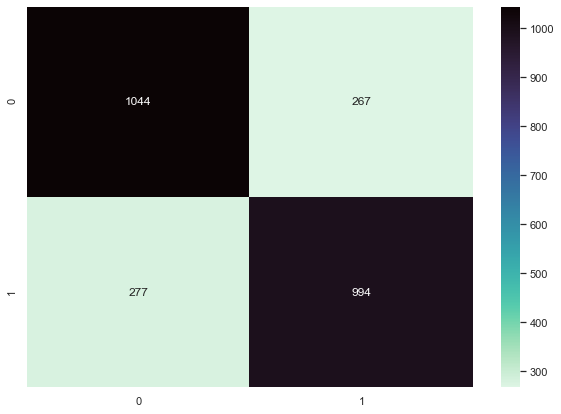

In [66]:
# Display confusion matrix
conf_mat = confusion_matrix(y_test, dtree_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='mako_r', fmt='g')

Observation: From above Decision tree Classification report and Heat map of Confusion-Matrix that Accuracy on the data is 79 for both churn and non churn customers and recall values is little bit more than the Churn customers.True positives are 1044 and true negatives are 994.Here Type-II Errors are Greater than the Type-I error So This model is Not much good for Classification.

#### Building Ensemble - Bagging

In [67]:
# Building Bagging Classifier

bgcl = BaggingClassifier(base_estimator= dtree, n_estimators=100,random_state=1)

bgcl.fit(X_train, y_train)

bgcl_predict = bgcl.predict(X_test)

print('Accuracy on Train data: %0.2f'%bgcl.score(X_train, y_train))
print('Accuracy on Test data: %0.2f'%bgcl.score(X_test, y_test))

print("\nclassification  Report For Ensemble - Bagging :\n",classification_report(y_test,bgcl_predict))

Accuracy on Train data: 1.00
Accuracy on Test data: 0.84

classification  Report For Ensemble - Bagging :
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1311
           1       0.83      0.85      0.84      1271

    accuracy                           0.84      2582
   macro avg       0.84      0.84      0.84      2582
weighted avg       0.84      0.84      0.84      2582



<AxesSubplot:>

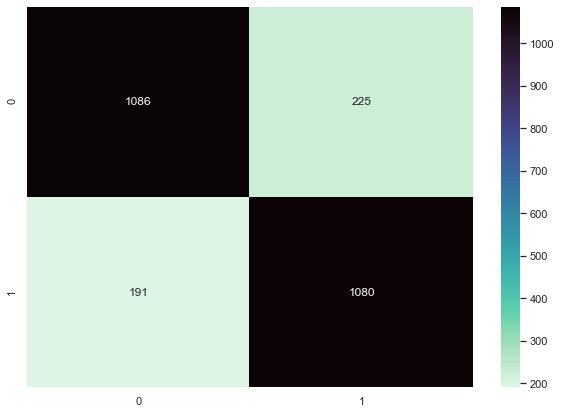

In [68]:
# Display confusion matrix
conf_mat = confusion_matrix(y_test, bgcl_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='mako_r', fmt='g')

Observation: From above bagging Classifiers Classification report and Heat map of Confusion-Matrix that Accuracy on the data is 84 Which is better Accuracy than Decision tree and recall values is little bit more than the non Churn customers.True positives are 1086 and true neagtives are 1080 we can see true positive and true negative rate is increased when compared to Decision tree model.Here Type-I Errors are Greater than the Type-II error So This model Will be good for Classification But low type_II Errors will be best classification.

#### Building Ensemble  -  AdaBoosting

In [69]:
# building AdaBoosting Classifier

adcl = AdaBoostClassifier(base_estimator= dtree,n_estimators=100, random_state=1)

adcl.fit(X_train, y_train)

adcl_predict = adcl.predict(X_test)

print('Accuracy on Train data: %0.2f'%adcl.score(X_train, y_train))
print('Accuracy on Test data: %0.2f'%adcl.score(X_test, y_test))

print("\nclassification  Report For Ensemble - AdaBoosting:\n",classification_report(y_test,adcl_predict))

Accuracy on Train data: 1.00
Accuracy on Test data: 0.84

classification  Report For Ensemble - AdaBoosting:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1311
           1       0.83      0.85      0.84      1271

    accuracy                           0.84      2582
   macro avg       0.84      0.84      0.84      2582
weighted avg       0.84      0.84      0.84      2582



<AxesSubplot:>

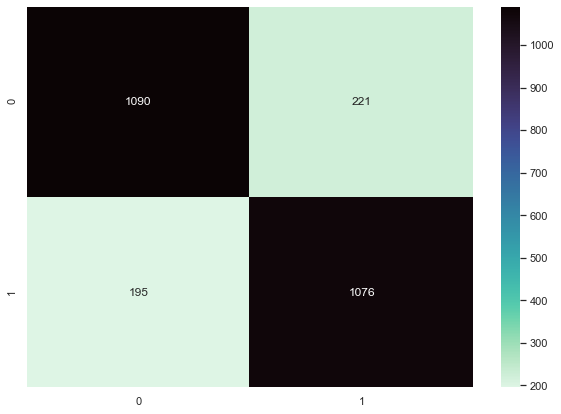

In [70]:
# Display confusion matrix
conf_mat = confusion_matrix(y_test, adcl_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='mako_r', fmt='g')

Observation: From above Ada Boosting Classifier model is almost equal to the bagging model Accuracy and true positive,true negative rate.But type_II errors values are greater then tha bagging So Adaboosting Will be best but not best than the Bagging for this data. 

#### Building Ensemble  -  GradientBoost

In [71]:
# Building Gradient boosting Classifier

gbcl = GradientBoostingClassifier(n_estimators = 100,random_state=1)

gbcl.fit(X_train, y_train)

gbcl_predict = gbcl.predict(X_test)

print('Accuracy on Train data: %0.2f'%gbcl.score(X_train, y_train))
print('Accuracy on Test data: %0.2f'%gbcl.score(X_test, y_test))

print("\nclassification  Report For Ensemble - Gradient Boosting:\n",classification_report(y_test,gbcl_predict))

Accuracy on Train data: 0.82
Accuracy on Test data: 0.80

classification  Report For Ensemble - Gradient Boosting:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      1311
           1       0.79      0.82      0.81      1271

    accuracy                           0.80      2582
   macro avg       0.81      0.81      0.80      2582
weighted avg       0.81      0.80      0.80      2582



<AxesSubplot:>

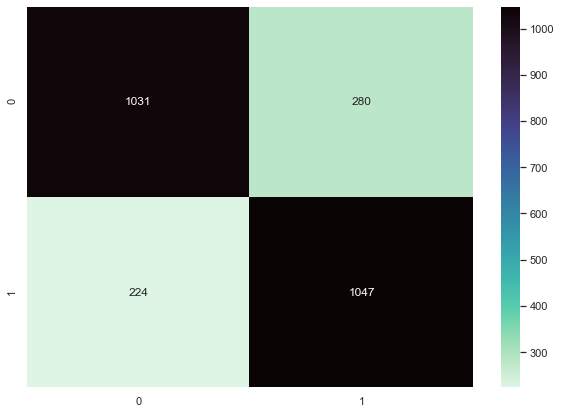

In [72]:
# Display confusion matrix
conf_mat = confusion_matrix(y_test, gbcl_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='mako_r', fmt='g')

Observation: From above Gradient boosting classifier Accuracy on train data is too low when compare to previous models and Accuracy on test data is greater than the decision tree.Accuracy is 80 on Both the Classes.

#### Building Ensemble RandomForest Classifier

In [73]:
# Building random Forest Classifier

rfcl = RandomForestClassifier(n_estimators = 100, random_state=1,max_features=10)

rfcl.fit(X_train, y_train)

rfcl_predict = rfcl.predict(X_test)

print('Accuracy on Train data: %0.2f'%rfcl.score(X_train, y_train))
print('Accuracy on Test data: %0.2f'%rfcl.score(X_test, y_test))

print("\nclassification  Report For Decision Tree:\n",classification_report(y_test,rfcl_predict))

Accuracy on Train data: 1.00
Accuracy on Test data: 0.84

classification  Report For Decision Tree:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1311
           1       0.83      0.85      0.84      1271

    accuracy                           0.84      2582
   macro avg       0.84      0.84      0.84      2582
weighted avg       0.84      0.84      0.84      2582



<AxesSubplot:>

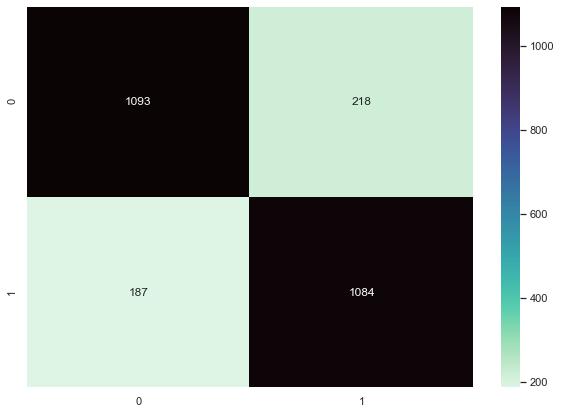

In [74]:
# Display confusion matrix
conf_mat = confusion_matrix(y_test, rfcl_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='mako_r', fmt='g')

Observation: From above Random Forest Classifiers Classification report and Heat map of Confusion-Matrix, that Accuracy on the data is 84 Which is better Accuracy than Decision tree,Equal to the bagging and Adaboosting models and recall values is little bit more than the non Churn customers.True positives are 1093 and true neagtives are 1084. we can see true positive and true negative rate is increased when compared to all Previous Models.Type_II Error Values are less than all precious models. Here Type-I Errors are Greater than the Type-II error So This model Will be good for Classification But low type_II Errors will be best classification.Random Forest Will given best Accuracy and less Type_II error.So , it will be the best among tha all previous models.

### Tunning Models

In [75]:
# Defining the funtion that gives all metrics for classification Modles

def all_metrics(model,X_train,y_train,X_test,y_test):  # take the model, train data and test data as input
    
    start = time.time()  # note the start time 

    model.fit(X_train, y_train)   # fit the model using the train data
    
    predict = model.predict_proba(X_test)
    
    pred = model.predict(X_test)

    acc = model.score(X_test,y_test)  # calculate the Accuracy on the test data
    
    cv = cross_val_score(model, X_train, y_train, cv=10, scoring = 'roc_auc').mean()   # perform cross validation accross 2 metrics
    
    # Compute ROC curve and area the curve for Models
    
    fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
    
    roc_auc = auc(fpr, tpr)
    
    recall = metrics.recall_score(y_test,pred,average='weighted')
    
    f1 = metrics.f1_score(y_test,pred,average='weighted')
    
    end = time.time()  #note the end time
    
    
    duration = end - start  # calculate the total duration
    
    
    return acc,cv,roc_auc,recall,f1,duration  # return all the metrics along with predictions

In [76]:
lg = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=7)
svm = SVC(gamma=0.25,probability=True)
dtree = DecisionTreeClassifier(random_state=1)
bgcl = BaggingClassifier(base_estimator= dtree, n_estimators=50,random_state=1)
adcl = AdaBoostClassifier(base_estimator= dtree,n_estimators=50, random_state=1)
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=10)

result1 = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([lg,nb,knn,svm,dtree,bgcl,adcl,gbcl,rfcl], ['Logistic Regression','Naive Bayes',
                                                                       'KNN','SVM','Decision Tree','Bagging Ensemble', 
                                                                       'AdaBoosting', 'Gradient Boosting','Random Forest']):
    result1[name] = all_metrics(model,X_train,y_train,X_test,y_test)

In [77]:
result1_data = pd.DataFrame(np.array(list(result1.values()))[:,:],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['Accuracy','Cross_validate','roc_auc','Recall','F1-Score','Duration'],
                      index= result1.keys())   # use the model names as index

result1_data.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1_data

,Accuracy,Cross_validate,roc_auc,Recall,F1-Score,Duration
Model,,,,,,
Logistic Regression,0.783888,0.863520,0.862938,0.783888,0.783627,1.036574
Naive Bayes,0.762587,0.846070,0.843582,0.762587,0.762368,0.207187
KNN,0.729667,0.808057,0.802287,0.729667,0.729682,3.796319
SVM,0.649497,0.770436,0.797165,0.649497,0.611785,474.257734
Decision Tree,0.789311,0.777707,0.789415,0.789311,0.789295,0.633599
Bagging Ensemble,0.833075,0.901618,0.907803,0.833075,0.833083,14.803832
AdaBoosting,0.832688,0.885960,0.904961,0.832688,0.832691,25.470294
Gradient Boosting,0.799768,0.883079,0.879257,0.799768,0.799719,7.308659
Random Forest,0.843532,0.907969,0.913002,0.843532,0.843539,11.853340


Observation: From above all metrics for all models, Random forest is performing better among all the models With 84% Accuracy, 90% Cross-validate Score and 91% roc_auc.All the models are running fast expect SVM and SVM performed Very badly among the all models.Bagging and AdaBoosting are also good models beacuse there Accurcies are little bit less than the Random Forest.

#####  we do smote on entire data it may leak information to validation data as well. we need to test the model with unseen information. so we will do sampling only on training data.find the metrics for All models Expect SVM(Because Sloe Runtime).

In [78]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

cat_col = encoded_data.select_dtypes(include=['category']).columns

# balancing the target variable using SMOTE on train Data.
smote_nc=SMOTENC(categorical_features=cat_col.get_indexer(cat_col),random_state=1) #specifying categorical column numbers
X_train_s,y_train_s=smote_nc.fit_resample(X_train,y_train)

In [79]:
result2 = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([lg,nb,knn,dtree,bgcl,adcl,gbcl,rfcl], ['Logistic Regression','Naive Bayes',
                                                                       'KNN','Decision Tree','Bagging Ensemble', 
                                                                       'AdaBoosting', 'Gradient Boosting','Random Forest']):
    result2[name] = all_metrics(model,X_train_s,y_train_s,X_test,y_test)

In [80]:
result2_data = pd.DataFrame(np.array(list(result2.values())),    # make a dataframe out of the metrics from result dictionary 
                       columns= ['Accuracy','Cross_validate','roc_auc','Recall','F1-Score','Duration'],
                      index= result2.keys())   # use the model names as index

result2_data.index.name = 'Model'   # name the index of the result3 dataframe as 'Model'

result2_data

,Accuracy,Cross_validate,roc_auc,Recall,F1-Score,Duration
Model,,,,,,
Logistic Regression,0.751991,0.863474,0.849319,0.751991,0.764899,1.803475
Naive Bayes,0.752560,0.844180,0.833922,0.752560,0.765563,0.351417
KNN,0.724687,0.808754,0.782492,0.724687,0.737012,3.815121
Decision Tree,0.730944,0.792932,0.679899,0.730944,0.736850,0.816013
Bagging Ensemble,0.769056,0.911677,0.812962,0.769056,0.772151,16.120878
AdaBoosting,0.744596,0.881695,0.756286,0.744596,0.751708,19.743194
Gradient Boosting,0.778157,0.883053,0.855501,0.778157,0.788655,6.594269
Random Forest,0.772469,0.915990,0.819653,0.772469,0.772935,9.906640


Observation: From above all metrics for all models after sampling on train data, Random forest and gradientBoosting moodels are performing better among all the models With 77% Accuracy,Randomforest has 90% Cross-validate Score and 81% roc_auc,But Gradient boosting have low Crossvalidate Score than Random forest and high roc_auccracy..Bagging is also good model beacuse theAccurcies are little bit less than the Random Forest and gradient boosting.

##### lets See Accuracies of the models for imbalanced Data

In [81]:
result3 = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([lg,nb,knn,dtree,bgcl,adcl,gbcl,rfcl], ['Logistic Regression','Naive Bayes',
                                                                       'KNN','Decision Tree','Bagging Ensemble', 
                                                                       'AdaBoosting', 'Gradient Boosting','Random Forest']):
    result3[name] = all_metrics(model,X_train,y_train,X_test,y_test)

In [82]:
result3_data = pd.DataFrame(np.array(list(result3.values())),    # make a dataframe out of the metrics from result dictionary 
                       columns= ['Accuracy','Cross_validate','roc_auc','Recall','F1-Score','Duration'],
                      index= result3.keys())   # use the model names as index

result3_data.index.name = 'Model'   # name the index of the result3 dataframe as 'Model'

result3_data

,Accuracy,Cross_validate,roc_auc,Recall,F1-Score,Duration
Model,,,,,,
Logistic Regression,0.800341,0.836245,0.844554,0.800341,0.794193,1.055296
Naive Bayes,0.755973,0.820065,0.833579,0.755973,0.767807,0.297534
KNN,0.784414,0.753562,0.780308,0.784414,0.771890,2.611975
Decision Tree,0.720705,0.661728,0.652474,0.720705,0.723697,0.586780
Bagging Ensemble,0.781570,0.812506,0.814449,0.781570,0.771336,12.485902
AdaBoosting,0.775882,0.764773,0.799196,0.775882,0.771059,14.030768
Gradient Boosting,0.801479,0.843181,0.852741,0.801479,0.790816,4.952770
Random Forest,0.783845,0.819527,0.819637,0.783845,0.772118,6.415194


 Observation : Gradient boosting and linear regression is performed well on imbalanced data with accuracy of 80%.But most of the models not performed well.So, lets find Hyperparameters for the models which are peformed well on Sampling on train data.

### Hyper Tuning

##### We can see that from above three tuning processes that Bagging Ensemble,gradient, random forest performed well.So, lets find hyper parameters for these three models.

##### Gridsearch and random search for Randomforest

In [83]:
# parameters for random forest

rfcl1 = RandomForestClassifier()

param_grid_rf = {'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4,6],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50,100]}

# train across 3 folds 
grid_forest_clf = GridSearchCV(rfcl1, param_grid_rf, cv=5,scoring='accuracy', n_jobs= -1, verbose = 1)

grid_forest_clf.fit(X_train_s, y_train_s)

print('\nBest Parameters are:',grid_forest_clf.best_params_)
print('\nBest Score: %0.2f'%grid_forest_clf.best_score_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits

Best Parameters are: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Best Score: 0.85


In [84]:
# Randomized Search for Random forest.

rand_forest_clf = RandomizedSearchCV(rfcl, param_grid_rf,random_state=1)

rand_forest_clf.fit(X_train_s, y_train_s)

print('\nBest Parameters are:',rand_forest_clf.best_params_)
print('\nBest Score: %0.2f'%rand_forest_clf.best_score_)


Best Parameters are: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}

Best Score: 0.84


##### Gridsearch and random search for Bagging Classifier

In [85]:
# parameters for Bagging Classifier

param_grid_bg = { 'base_estimator': [dtree],
              'n_estimators' : [50 ,75, 100],
              'max_features': [10, 12, 17] 
              }

grid_bg_clf = GridSearchCV(bgcl, param_grid_bg, cv=5, scoring="accuracy", n_jobs= -1, verbose = 1)
grid_bg_clf.fit(X_train_s,y_train_s)

print('\nBest Parameters are:',grid_bg_clf.best_params_)
print('\nBest Score: %0.2f'%grid_bg_clf.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best Parameters are: {'base_estimator': DecisionTreeClassifier(random_state=1), 'max_features': 12, 'n_estimators': 100}

Best Score: 0.84


In [86]:
# Randomized Search for Bagging Classifier.

rand_bg_clf = RandomizedSearchCV(bgcl, param_grid_bg,random_state=1)

rand_bg_clf.fit(X_train_s, y_train_s)

print('\nBest Parameters are:',rand_bg_clf.best_params_)
print('\nBest Score: %0.2f'%rand_bg_clf.best_score_)


Best Parameters are: {'n_estimators': 100, 'max_features': 12, 'base_estimator': DecisionTreeClassifier(random_state=1)}

Best Score: 0.84


##### Gridsearch and random search for Gradient Boosting Classifier

In [87]:
param_grid_gb = {
              'n_estimators' : [25, 50 ,75, 100, 200],
              'learning_rate': [0.005 ,0.05, 0.5, 1.5],
              'max_depth': [2, 4, 6, 8],
              'max_features': [10, 12, 17] 
              }

grid_gb_clf = GridSearchCV(gbcl, param_grid_gb, cv=5, scoring="accuracy", n_jobs= -1, verbose = 1)
grid_gb_clf.fit(X_train_s,y_train_s)

print('\nBest Parameters are:',grid_gb_clf.best_params_)
print('\nBest Score: %0.2f'%grid_gb_clf.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits

Best Parameters are: {'learning_rate': 0.05, 'max_depth': 8, 'max_features': 10, 'n_estimators': 200}

Best Score: 0.84


In [88]:
# Randomized Search for gradient boosting Classifier.

rand_gb_clf = RandomizedSearchCV(gbcl, param_grid_gb,random_state=1)

rand_gb_clf.fit(X_train_s, y_train_s)

print('\nBest Parameters are:',rand_gb_clf.best_params_)
print('\nBest Score: %0.2f'%rand_gb_clf.best_score_)


Best Parameters are: {'n_estimators': 100, 'max_features': 10, 'max_depth': 6, 'learning_rate': 0.05}

Best Score: 0.82


##### Observation : From Above hypertuning for three modles RandomForest Classifier is performed well With 85% Accuracy.So, random Forest will be the Best Model for the data.

##### lets plot ROC AUC graph for three models.

In [89]:
rfcl2 = RandomForestClassifier(bootstrap = False, max_depth = None, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
bgcl2 = BaggingClassifier(base_estimator= dtree, n_estimators=100,random_state=1,max_features=12)
gbcl2 = GradientBoostingClassifier(n_estimators = 200,random_state=1,learning_rate=0.05,max_depth=8,max_features=10)
# calculate cross-validated AUC
# prepare models
models = []
models.append(('Random Forest Classifier ', rfcl2))
models.append(('Bagging Classifier', bgcl2))
models.append(('Gradient Boosting Classifier', gbcl2))
for name,model in models:
    aucc = cross_val_score(model, X_train_s, y_train_s, cv=10, scoring='roc_auc').mean()
    print('For ',name,':',aucc)

For  Random Forest Classifier  : 0.9178963254534608
For  Bagging Classifier : 0.9192926891523481
For  Gradient Boosting Classifier : 0.9149450879743407


##### Observation : We can see That three models performed Well with mean accuracy of 92.

##### From all Above Modeling techniques Random Forest Classifier Will be best Model.So, lets  save the model for futher use using Pickle.

In [90]:
import pickle

with open("randomforest.pickle" , "wb") as rfcfile:
    pickle.dump(grid_forest_clf , rfcfile)

In [91]:
pickle_model = open("randomforest.pickle" , "rb")
rf_model = pickle.load(pickle_model)

In [92]:
print('Best parameters for Random Forest Classifier are :',rf_model.best_params_)
print('Best Score is:%0.2f'%rf_model.best_score_)

Best parameters for Random Forest Classifier are : {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score is:0.85


### 6. Conclusion and improvisation:

### Conclusion

    We can select Randomforest Classifier is the best model to predict the Churn of the customers in the telecom company.because, Random forest classifier has performed well on all techiniques like grid dearch, random search Cv.Best Accuracy for the data is 85%.
    
    Sampling on train data will be good for modelling that most of the classifiers performed well.Roc and cross validate Accuracy of random forest is better than other models.
    
    Bagging classifier, gradient boosting classifier and Random forest classifier models are good for modelling three models are performed well on all techniques and Random forest is little better than two models.

### Improvisation

1. Data has Huge imblance on target varibale it may lead to decrease the Accuracy so Same no of observations on target varible will increase the accuracy.

2. If Data contains the average usage per day and churn score will be used for Modelling to get accuracy.

3. if residental area column is added then it will be good that calculating the churn customers based on the area and Cost Effective will decrease if less customers in the area.